# Detailed Analysis on Ford GoBike Usage Pattern(2018)
## by Ishan Arora

## Investigation Overview

Ford GoBike or now known as Bay Wheels is a bike sharing service in San Francisco Bay Area, California.It has nearly 500,000 rides since its launch in 2017 and 10000 subscribers as of Jan 2018. In this investigation we took a deep dive into the bike usage patterns and find out some interesting observations

## Dataset Overview

The dataset that we we will use consistes of monthly individual trip data from Jan2018 to December2018 in csv format. Some columns have been added and wrangling has been done for best visualisations.
There are 1863721 entries,in our dataset with 20 variables. The datset consists of data from over 12 months from January 2018-December 2018
The variables are as follows:
* duration,start_time,end_time(This is basically the duration info)
* start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude(This is basically station info)
* bike_id, user_type, bike_share_for_all_trip(This is the member info. Also it is private)<br>
<b>Apart from that I made some columns which will be usefull for our analysis:</b>
- startdate,startmonth,starthour,startweek

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df=pd.read_csv("fordgobike_master.csv")

In [4]:
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_minute,start_hour,start_day,start_date,start_month
553609,135,2018-06-11 08:10:05.819,2018-06-11 08:12:21.662,182.0,19th Street BART Station,37.809013,-122.268247,337.0,Webster St at 19th St,37.80697,-122.266588,1344,Subscriber,No,2.25,8,Monday,2018-06-11,June


## Variation of Users by month, day,weeks
 So we will start our observations by looking how does the count of total users varies by Days,Month and Years

In [6]:
#setting the base color
base_color=sb.color_palette()[0]

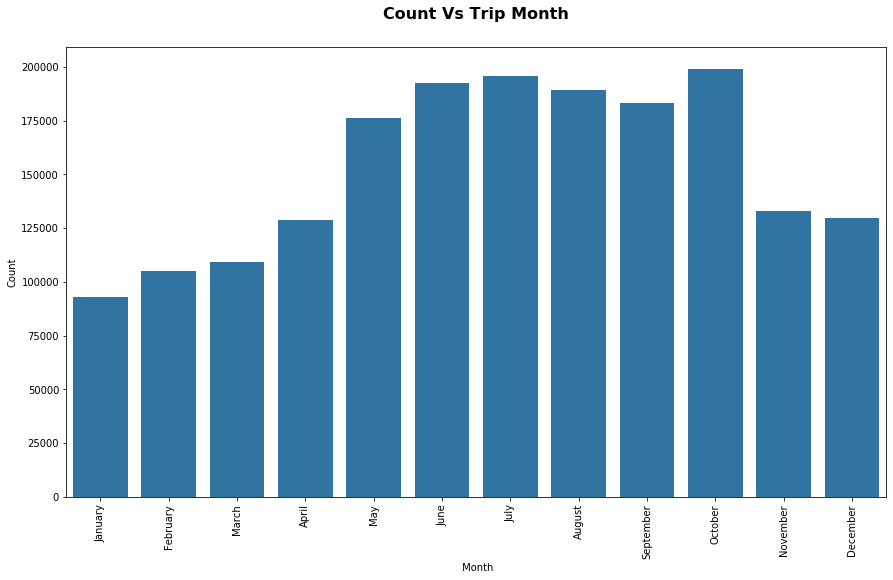

In [22]:
fig=plt.figure(figsize=[14.70, 8.27])




order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sb.countplot(data=df, x='start_month',order=order,color=base_color);
plt.xticks(rotation=90);
plt.xlabel(' Month');
plt.ylabel('Count');
plt.title('Count Vs Trip Month', y=1.05, fontsize=16, fontweight='bold', color = 'black');

Well As we can obseve:
* All winter months have less counts given the fact it is too cold(Nov-Feb)
* Summer months have a relatively larger count. (May-Sept)
* It peaks in October which is the most pleasant month

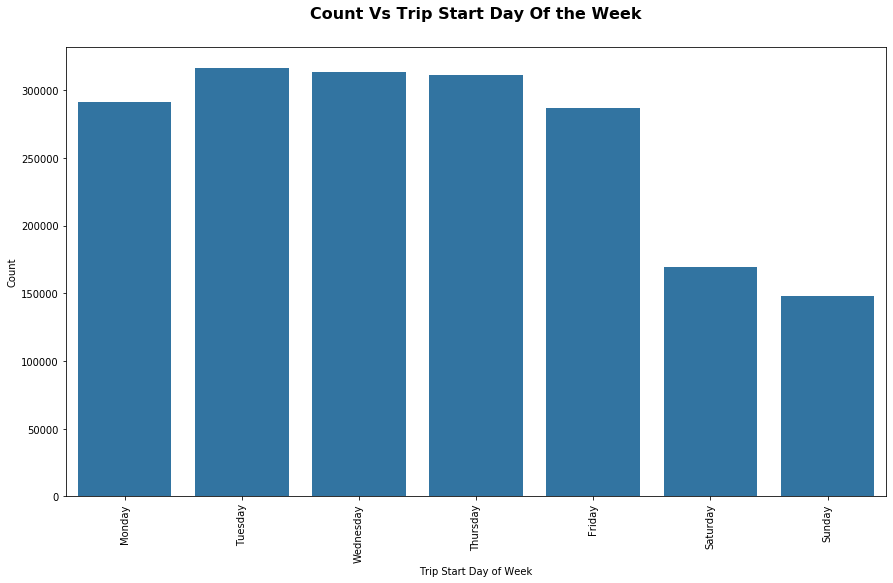

In [23]:
fig=plt.figure(figsize=[14.70, 8.27])



order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=df, x='start_day', color=base_color,order=order);
plt.xlabel('Trip Start Day of Week');
plt.xticks(rotation=90);
plt.ylabel('Count');
plt.title('Count Vs Trip Start Day Of the Week', y=1.05, fontsize=16, fontweight='bold', color = 'black');

What we observe :
* Count in weekdays is pretty much high than count in weekends
* In the weekdays Monday has the lowest count. Monday is notorously famous for this
* This shows people mostly use it for office rather than recreation

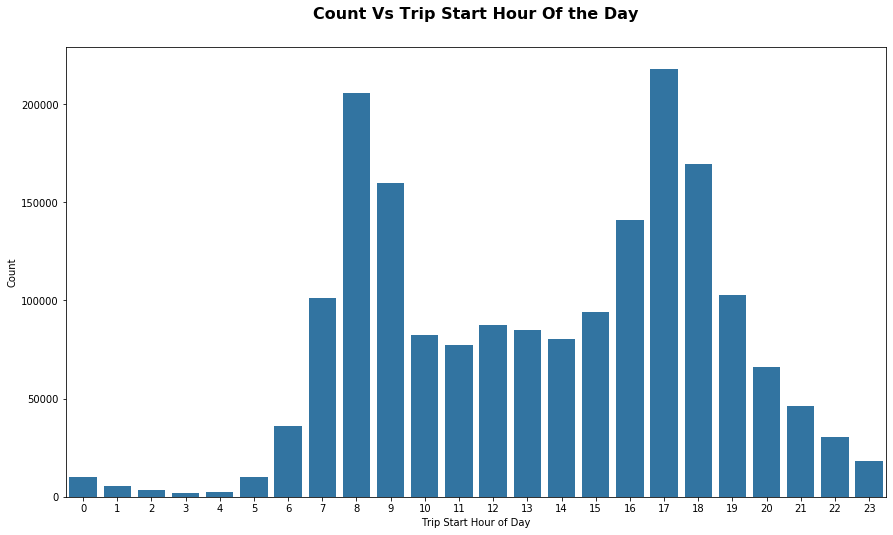

In [24]:
fig=plt.figure(figsize=[14.70, 8.27])



sb.countplot(data=df, x='start_hour', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');
plt.title('Count Vs Trip Start Hour Of the Day', y=1.05, fontsize=16, fontweight='bold', color = 'black');

What we observe:
* It peaks at 8AM and 5PM two of the most common times of office going and coming back resp.
* At late night also some people do love cycling

## Users Type and Their variation Monthly,Weekly,Hourly

Now that we have seen the total count let's break our users into-customers and subscibers. First we will start out by seeing proportion of people as customers and subscirbers and then their variation daily,monthly and hourly. We will also some some amazing plots at the end to further strenthen our observations

In [11]:
user_type=df['user_type'].value_counts()

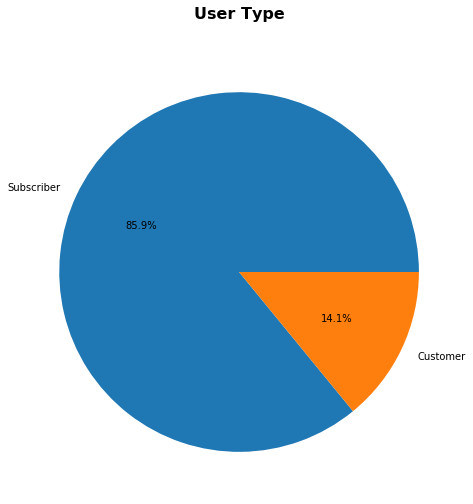

In [25]:
fig=plt.figure(figsize=[14.70, 8.27])




plt.pie(user_type,labels=user_type.index,autopct= '%1.1f%%')
plt.title('User Type', y=1.05, fontsize=16, fontweight='bold', color = 'black');

* 85%  of people that have subscribed. Well having subscribed gives you a loads of benifits. And people love that.

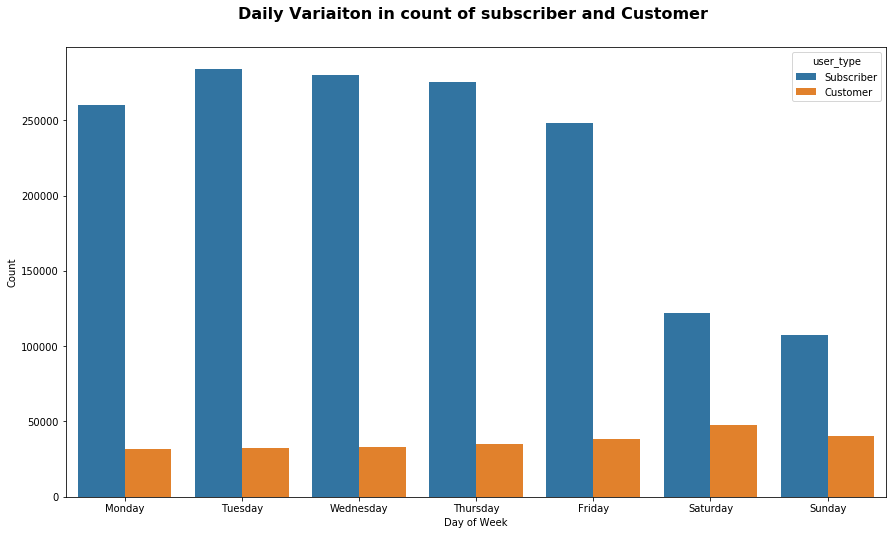

In [33]:
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig=plt.figure(figsize=[14.70, 8.27])

plt.title('Daily Variaiton in count of subscriber and Customer ', y=1.05, fontsize=16, fontweight='bold', color = 'black');


sb.countplot(data=df, x='start_day', hue='user_type',order=order);
plt.xlabel('Day of Week');
plt.ylabel('Count');

Some interesting observations:
* Mostly subscribers prefer cycling on weekdays this means Mostly subscirbers are office going ppl
* Generally on weekdays the ratio is maintained(85:15)
* But on weekends there is a spike in customers and a substantial drop in subscribers again pointing out that office ppl are the one's who generally subscribe

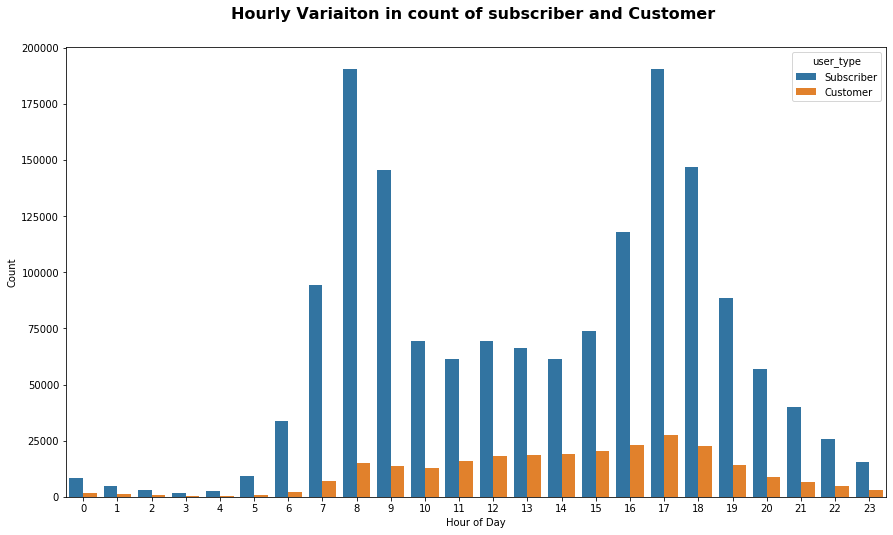

In [34]:

fig=plt.figure(figsize=[14.70, 8.27])


plt.title('Hourly Variaiton in count of subscriber and Customer ', y=1.05, fontsize=16, fontweight='bold', color = 'black');

sb.countplot(data=df, x='start_hour', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

* Again same observations in the peak time both customers and subscribers increase but maintain the ratio throughout 

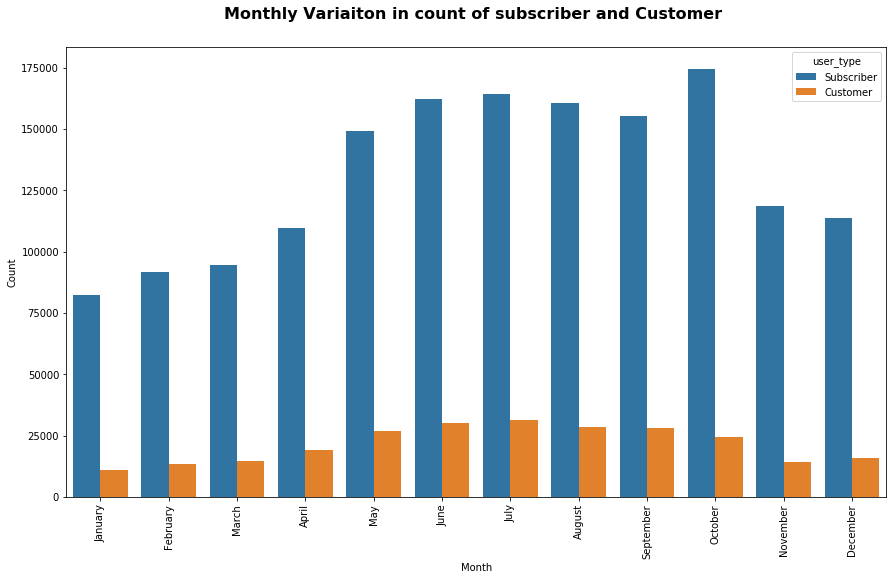

In [35]:
fig=plt.figure(figsize=[14.70, 8.27])

order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sb.countplot(data=df, x='start_month', hue='user_type',order=order);
plt.xticks(rotation=90);
plt.xlabel('Month');
plt.ylabel('Count');

plt.title('Monthly Variaiton in count of subscriber and Customer ', y=1.05, fontsize=16, fontweight='bold', color = 'black');



Observations:
* General spike in summer months and october (as estbld earlier)
* Both customers and subscibers increase in summer months and october <br>
Nothing Significant as such

## Lets see what is the average duration of the  cyclers
> Here we would look for how much time do the cyclers cycle.

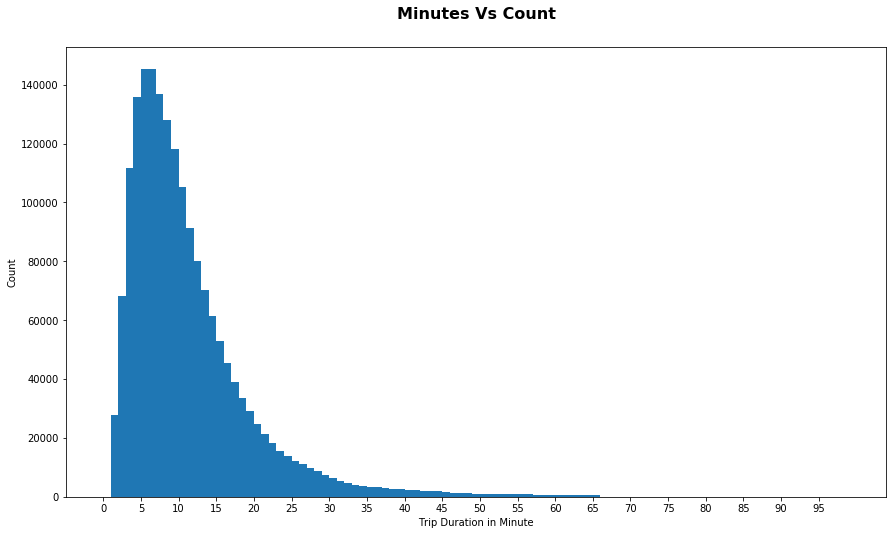

In [38]:
fig=plt.figure(figsize=[14.70, 8.27])



bins = np.arange(0, 100, 1)
ticks = np.arange(0, 100, 5)
plt.hist(data=df, x='duration_minute', bins=bins);
plt.xticks(ticks);
plt.ylabel('Count')
plt.xlabel('Trip Duration in Minute');
plt.title('Minutes Vs Count', y=1.05, fontsize=16, fontweight='bold', color = 'black');

* Average duration is of cycling is around 11 minutes. But there can be exception too. Mostly exceptions arise from casual customers which we will see now

## How does trip duration varies with different kind of users?

> Continuing our journey furthewr we will see how the trip duration varies with each type of user. We will be looking at various observations for instance how the duration between different users is spread on all the days

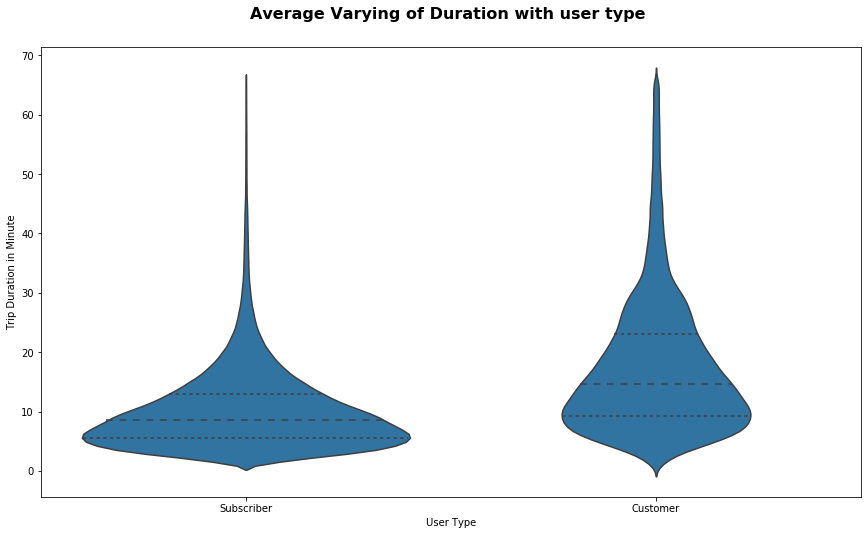

In [36]:
fig=plt.figure(figsize=[14.70, 8.27])
plt.title('Average Varying of Duration with user type ', y=1.05, fontsize=16, fontweight='bold', color = 'black');


sb.violinplot(data=df, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

Observations:
* Subscribers generally have a fixed schedule and duration is narrower
* Customers are widely spread throughout. Most are casual customers and different customers have different demands

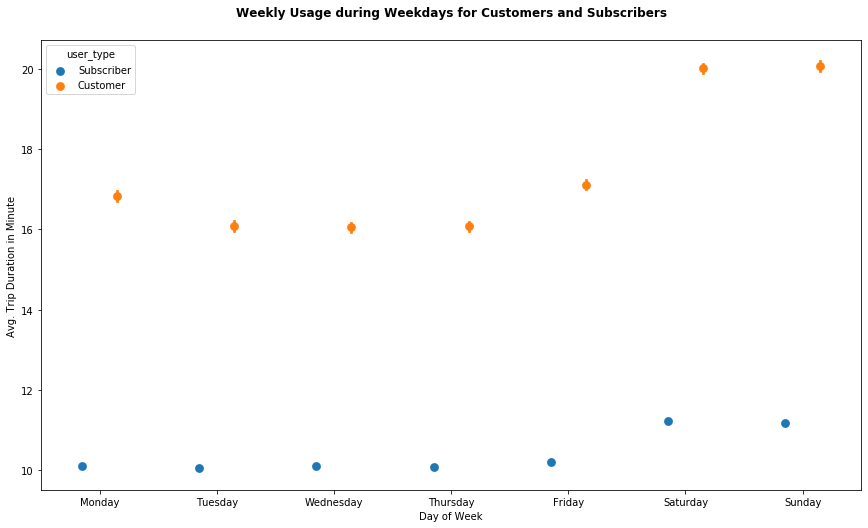

In [37]:
fig=plt.figure(figsize=[14.70, 8.27])

order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']



plt.title("Weekly Usage during Weekdays for Customers and Subscribers", y = 1.04,fontweight='bold', color = 'black')


sb.pointplot(data=df, x='start_day', y='duration_minute', hue='user_type', dodge=0.3, linestyles="",order=order);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

* Well customers have large duration each day especially on weekends
* Subscribers are consistent through all weekdays
* On the weekdays it is evident that casual customers increase and they go for long rides

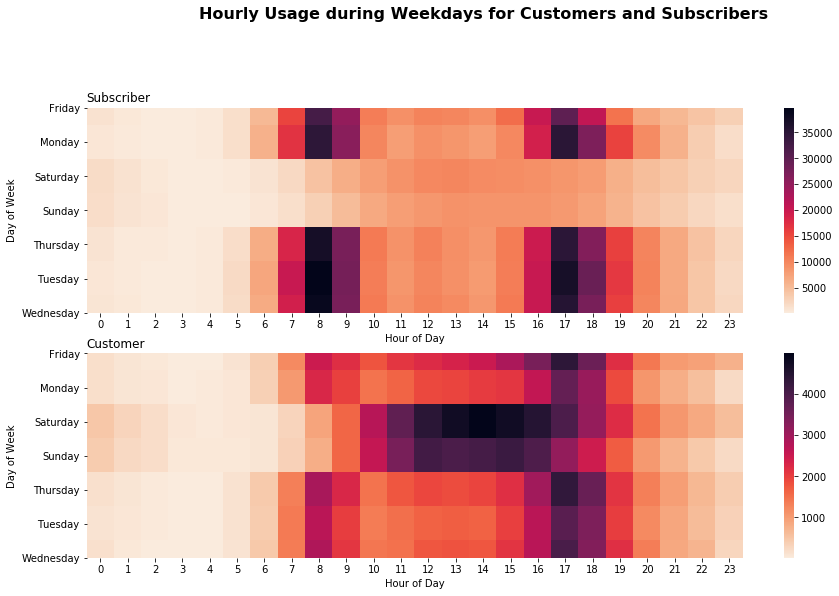

In [32]:
fig=plt.figure(figsize=[14.70, 8.27])


plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', y=1.05, fontsize=16, fontweight='bold', color = 'black');

plt.subplot(2, 1, 1)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='left');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');



plt.subplot(2, 1, 2)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='left');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

Many trips for subscirbers are between 8AM and 5PM the regular office hours. While they might be some customers who also used to commute to office

### Summary
<p style="font-size:17px;"> As we saw there were a lot of subscribers who were taking this bike sharing service than casual customers. We observed various different patterns like how subscribers are more on weekdays and how customers have varied time durations ,how the count  peaked during office hours like 8AM and 5PM stc.
